Number of rows in dataset: 20

First 5 rows:
   sqft  sale_price  sale_price_pred
0  2416      208500      215635.4687
1  2240      181500      202432.1633
2  2272      223500      204832.7643
3  1933      140000      179401.3976
4  2853      250000      248418.6758

Data summary statistics:
              sqft     sale_price  sale_price_pred
count    20.000000      20.000000        20.000000
mean   2062.700000  181270.000000    189131.333468
std     617.708678   68215.603247     46339.751824
min     854.000000   90000.000000     98456.133260
25%    1732.250000  137250.000000    164341.377350
50%    1939.500000  153000.000000    179889.019700
75%    2308.000000  212250.000000    207533.440400
max    3322.000000  345000.000000    283602.484000


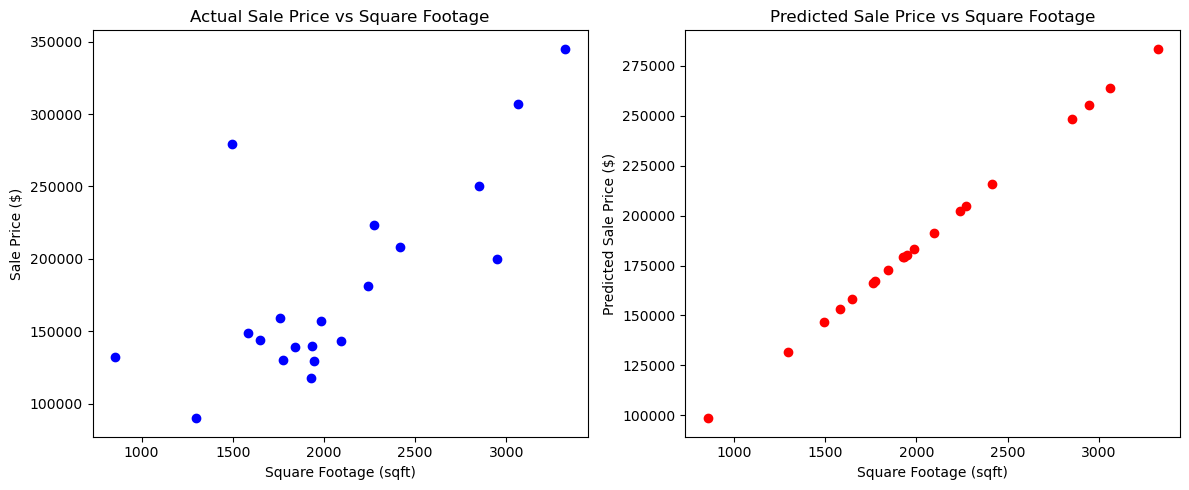


Model Evaluation Metrics:
Mean Squared Error: 2190875074.37
Root Mean Squared Error: 46806.78
R-squared: 0.50


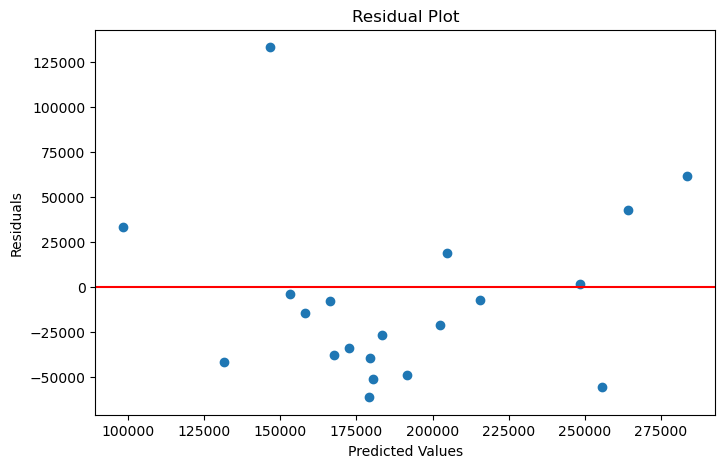

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Create DataFrame directly from the provided data (since we don't have the actual file)
data = {
    'sqft': [2416, 2240, 2272, 1933, 2853, 2094, 3063, 2949, 1774, 1928, 1946, 3322, 1649, 1494, 1986, 854, 1582, 1296, 1760, 1843],
    'sale_price': [208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000, 129500, 345000, 144000, 279500, 157000, 132000, 149000, 90000, 159000, 139000],
    'sale_price_pred': [215635.4687, 202432.1633, 204832.7643, 179401.3976, 248418.6758, 191479.4213, 264172.6198, 255620.4788, 167473.4115, 179026.3037, 180376.6418, 283602.484, 158096.0639, 146468.1529, 183377.393, 98456.13326, 153069.8056, 131614.4343, 166423.1485, 172649.7073]
}

df = pd.DataFrame(data)

# 2. Data Exploration
print(f"Number of rows in dataset: {len(df)}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData summary statistics:")
print(df.describe())

# 3. Data Visualization
plt.figure(figsize=(12, 5))

# Scatter plot of actual sale prices vs square footage
plt.subplot(1, 2, 1)
plt.scatter(df['sqft'], df['sale_price'], color='blue')
plt.title('Actual Sale Price vs Square Footage')
plt.xlabel('Square Footage (sqft)')
plt.ylabel('Sale Price ($)')

# Scatter plot of predicted sale prices vs square footage
plt.subplot(1, 2, 2)
plt.scatter(df['sqft'], df['sale_price_pred'], color='red')
plt.title('Predicted Sale Price vs Square Footage')
plt.xlabel('Square Footage (sqft)')
plt.ylabel('Predicted Sale Price ($)')

plt.tight_layout()
plt.show()

# 4. Model Evaluation (comparing actual vs predicted prices)
mse = mean_squared_error(df['sale_price'], df['sale_price_pred'])
rmse = np.sqrt(mse)
r2 = r2_score(df['sale_price'], df['sale_price_pred'])

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# 5. Residual Analysis
residuals = df['sale_price'] - df['sale_price_pred']
plt.figure(figsize=(8, 5))
plt.scatter(df['sale_price_pred'], residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()